### Reference
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


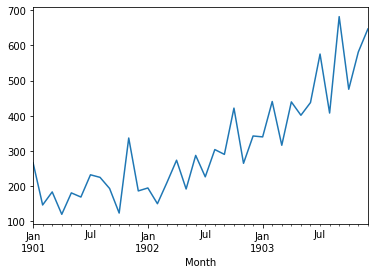

In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

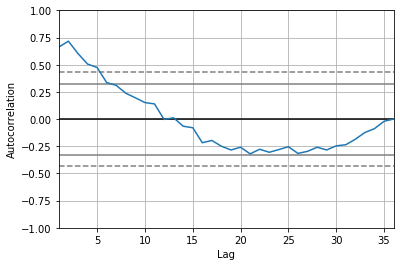

In [8]:
# Finding autocorrelation with pandas
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

/home/rahul/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/rahul/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 18 Feb 2020   AIC                            406.340
Time:                        10:51:45   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

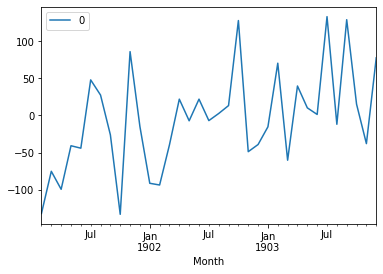

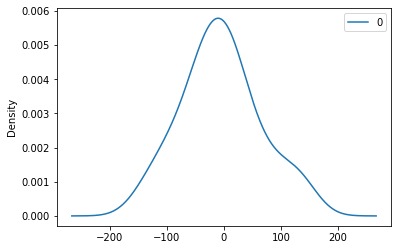

                0
count   35.000000
mean    -5.495267
std     68.132879
min   -133.296649
25%    -42.477975
50%     -7.186677
75%     24.748283
max    133.237923


In [10]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117705, expected=342.300000
predicted=306.512977, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154194, expected=315.900000
predicted=386.308770, expected=439.300000
predicted=356.081960, expected=401.300000
predicted=446.379501, expected=437.400000
predicted=394.737276, expected=575.500000
predicted=434.915504, expected=407.600000
predicted=507.923350, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343452, expected=646.900000
Test MSE: 6958.330


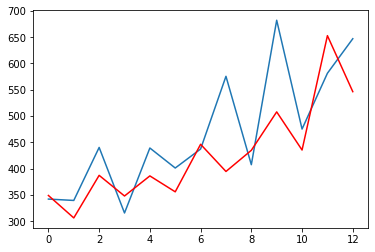

In [11]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Trying ARIMA model on Trajectory Data

       0
0  0.000
1 -0.105
2  0.035
3  0.435
4  0.630


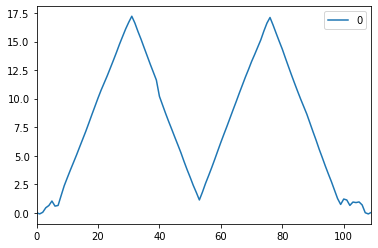

In [20]:
from pandas import read_csv, DataFrame
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = read_csv('steps_train.txt', skiprows=1, nrows=110, header=None, usecols=[1,2])
series = DataFrame((df[1]+df[2])/2)
print(series.head())
series.plot()
pyplot.show()

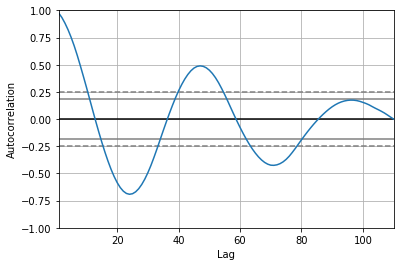

In [21]:
# Finding autocorrelation with pandas
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = read_csv('steps_train.txt', skiprows=1, nrows=110, header=None, usecols=[1,2])
series = DataFrame((df[1]+df[2])/2)
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  109
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -23.370
Method:                       css-mle   S.D. of innovations              0.298
Date:                Tue, 18 Feb 2020   AIC                             60.741
Time:                        11:44:18   BIC                             79.580
Sample:                             1   HQIC                            68.381
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.257      0.006      0.995      -0.501       0.504
ar.L1.D.y      0.8549      0.096      8.940      0.000       0.667       1.042
ar.L2.D.y     -0.0624      0.126     -0.495      0.6

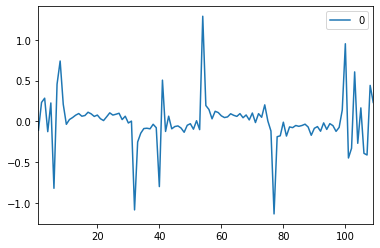

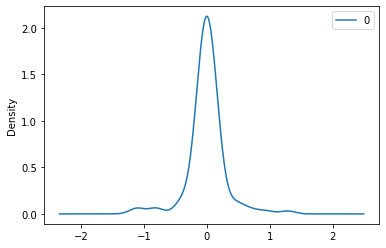

                0
count  109.000000
mean     0.000542
std      0.299226
min     -1.132129
25%     -0.087269
50%      0.005188
75%      0.092666
max      1.287180


In [29]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame, Series
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

df = read_csv('steps_train.txt', skiprows=1, nrows=110, header=None, usecols=[1,2])
series = Series((df[1]+df[2])/2)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=0.429152, expected=0.735000
predicted=0.801675, expected=0.375000
predicted=0.033576, expected=0.560000
predicted=0.741787, expected=1.410000
predicted=2.091255, expected=2.140000
predicted=2.768234, expected=2.850000
predicted=3.518986, expected=3.560000
predicted=4.197552, expected=4.185000
predicted=4.754706, expected=4.840000
predicted=5.438998, expected=5.340000
predicted=5.794924, expected=5.225000
predicted=5.161376, expected=4.655000
predicted=4.201434, expected=3.985000
predicted=3.400179, expected=3.335000
predicted=2.742808, expected=2.685000
predicted=2.094878, expected=2.105000
predicted=1.580000, expected=2.330000
predicted=2.500550, expected=2.955000
predicted=3.449749, expected=3.685000
predicted=4.339640, expected=4.490000
predicted=5.219365, expected=5.325000
predicted=6.075357, expected=6.240000
predicted=7.063863, expected=7.045000
predicted=7.769584, expected=7.715000
predicted=8.333702, expected=8.380000
predicted=8.985573, expected=9.040000
predicted=9.

predicted=0.614881, expected=0.595000
predicted=0.935441, expected=1.215000
predicted=1.800276, expected=0.945000
predicted=0.668979, expected=0.025000
predicted=-0.737858, expected=-0.805000
predicted=-1.508624, expected=-1.420000
predicted=-1.975009, expected=-2.015000
predicted=-2.557615, expected=-2.310000
predicted=-2.564665, expected=-1.665000
predicted=-1.086180, expected=-1.000000
predicted=-0.475110, expected=-0.275000
predicted=0.389573, expected=0.480000
predicted=1.143934, expected=0.785000
predicted=1.041279, expected=1.060000
predicted=1.339283, expected=1.930000
predicted=2.717411, expected=2.650000
predicted=3.243814, expected=3.140000
predicted=3.595845, expected=3.740000
predicted=4.288471, expected=4.325000
predicted=4.834115, expected=4.830000
predicted=5.284546, expected=5.205000
predicted=5.541151, expected=5.190000
predicted=5.173594, expected=4.620000
predicted=4.122201, expected=3.900000
predicted=3.288770, expected=3.165000
predicted=2.510829, expected=2.43500

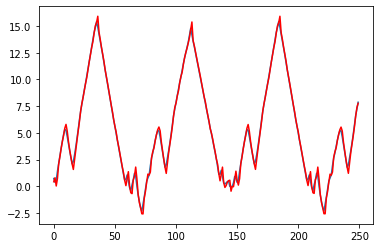

In [19]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

df = read_csv('steps_train.txt', skiprows=1, header=None, usecols=[1,2])
train = Series((df[1]+df[2])/2)
df = read_csv('steps_test.txt', skiprows=1, nrows=250, header=None, usecols=[1,2])
test = Series((df[1]+df[2])/2)
size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()